### How do I work with dates and times in pandas?

**Using datetime Module**

In [13]:
import pandas as pd
import datetime # one of python module

**Datetime module Date object**

In [19]:
datetime.date# from datetime module date object

datetime.date

**Date object today() function**

In [ ]:
datetime.date.today() ## prints today's date (yyyy-mm-dd)

**Datetime module datetime object**

In [20]:
datetime.datetime# from datetime module datetime object

datetime.datetime

**datetime object now() function**

In [18]:
datetime.datetime.now()# prints the current time in microseconds

datetime.datetime(2021, 9, 4, 21, 56, 14, 777405)

### **to_datetime Function**: convert argument to datetime

In [8]:
df = pd.DataFrame({"year":[2015, 2016], "month":[2,3], "day":[4,5]})
print(df)
df.dtypes

   year  month  day
0  2015      2    4
1  2016      3    5


year     int64
month    int64
day      int64
dtype: object

In [11]:
pd.to_datetime(df)

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [12]:
df.dtypes

year     int64
month    int64
day      int64
dtype: object

**If a date does not meet the `timestamp limitations**

In [4]:
pd.to_datetime('13000101', format='%Y%m%d', errors='ignore')#will return the original input instead of raising any exception.

datetime.datetime(1300, 1, 1, 0, 0)

In [66]:
pd.to_datetime('13000101', format='%Y%m%d', errors='coerce')#will force an out-of-bounds date to NaT, in addition to forcing non-dates (or non-parseable dates) to NaT.

NaT

### Data School

In [2]:
ufo = pd.read_csv("http://bit.ly/uforeports")

In [3]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [18]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [19]:
ufo.Time.str.slice(-5,-3).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: object

In [20]:
ufo.Time.str.slice(-5,-3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

In [21]:
ufo["Time"] = pd.to_datetime(ufo.Time)

In [22]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [23]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [25]:
ufo.Time.dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [32]:
ufo.Time.dt.day_name().head()

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [35]:
ufo.Time.dt.weekday.head()

0    6
1    0
2    6
3    0
4    1
Name: Time, dtype: int64

In [38]:
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

In [42]:
pd.to_datetime("1/1/1999")

Timestamp('1999-01-01 00:00:00')

In [40]:
ts = pd.to_datetime("1/1/1999")

In [43]:
ufo.loc[ufo.Time >=ts, :].head()

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [44]:
ufo.Time.max() 

Timestamp('2000-12-31 23:59:00')

Timedelta object

In [45]:
ufo.Time.max() - ufo.Time.min() 

Timedelta('25781 days 01:59:00')

In [46]:
%matplotlib inline

In [47]:
ufo["Year"] = ufo.Time.dt.year
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


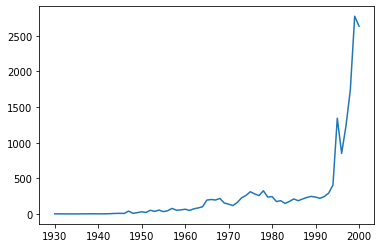

In [53]:
ufo.Year.value_counts().sort_index().plot()

**Example**

In [33]:
s = pd.Series(['3/11/2000', '3/12/2000', '3/13/2000'] * 1000)
s.head()

0    3/11/2000
1    3/12/2000
2    3/13/2000
3    3/11/2000
4    3/12/2000
dtype: object

In [36]:
s.dtypes

dtype('O')

In [37]:
d = {"col1": [1,2], "col2": [3,4]}

In [38]:
d

{'col1': [1, 2], 'col2': [3, 4]}

In [39]:
df = pd.DataFrame(d)

In [40]:
df

,col1,col2
0,1,3
1,2,4


In [41]:
df.dtypes

col1    int64
col2    int64
dtype: object

In [42]:
df.astype("int32").dtypes

col1    int32
col2    int32
dtype: object

In [43]:
df["col1"] = pd.to_datetime(df["col1"])

In [44]:
df

,col1,col2
0,1970-01-01 00:00:00.000000001,3
1,1970-01-01 00:00:00.000000002,4


In [45]:
df.dtypes

col1    datetime64[ns]
col2             int64
dtype: object

In [46]:
pd.to_datetime(pd.Series(['05/23/2005']), format="%m/%d/%Y")

0   2005-05-23
dtype: datetime64[ns]

In [47]:
# scalar type
string_to_convert = "2020-02-01"
print("Your string: {}".format(string_to_convert))
print("Your string_to_convert type: {}".format(type(string_to_convert)))
print()
# convert your string
new_date=pd.to_datetime(string_to_convert)
print("Your new date is: {}".format(new_date))
print("Your new type is: {}".format(type(new_date)))

Your string: 2020-02-01
Your string_to_convert type: <class 'str'>

Your new date is: 2020-02-01 00:00:00
Your new type is: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


**convert pandas series to datetime**

In [48]:
s = pd.Series(["2020-02-01","2020-02-02", "2020-02-03", "2020-02-04" ])
s

0    2020-02-01
1    2020-02-02
2    2020-02-03
3    2020-02-04
dtype: object

In [49]:
s = pd.to_datetime(s)
s

0   2020-02-01
1   2020-02-02
2   2020-02-03
3   2020-02-04
dtype: datetime64[ns]

**convert pandas series to datetime w/ custom format**

In [50]:
s = pd.Series(["My 3date is 01199002","My 3date is 02199015", "My 3date is 03199020", "My 3date is 09199204" ])
s

0    My 3date is 01199002
1    My 3date is 02199015
2    My 3date is 03199020
3    My 3date is 09199204
dtype: object

In [51]:
s = pd.to_datetime(s, format = "My 3date is %m%Y%d")
s

0   1990-01-02
1   1990-02-15
2   1990-03-20
3   1992-09-04
dtype: datetime64[ns]

In [54]:
df = pd.DataFrame({'Date':['11/8/2011', '04/23/2008', '10/2/2019'],
                'Event':['Music', 'Poetry', 'Theatre'],
                'Cost':[10000, 5000, 15000]})
print(df)
df.dtypes

         Date    Event   Cost
0   11/8/2011    Music  10000
1  04/23/2008   Poetry   5000
2   10/2/2019  Theatre  15000


Date     object
Event    object
Cost      int64
dtype: object

In [56]:
df.Date = pd.to_datetime(df.Date, format = "%m/%d/%Y")
df.dtypes

Date     datetime64[ns]
Event            object
Cost              int64
dtype: object

### Python Pandas Tutorial (Part 10): Working with Dates and Time Series Data

In [130]:
import pandas as pd

In [131]:
df = pd.read_csv("C:/Users/Owner/ETH_1h.csv")

In [132]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [133]:
df.shape

(23674, 7)

In [134]:
df.dtypes

Date       object
Symbol     object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [135]:
df.loc[0, "Date"]

'2020-03-13 08-PM'

Running **datetime method** on this

'str' object has no attribute 'day_name'

In [136]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d %I-%p")

In [137]:
df["Date"].head()#now it turn to datetime object

0   2020-03-13 20:00:00
1   2020-03-13 19:00:00
2   2020-03-13 18:00:00
3   2020-03-13 17:00:00
4   2020-03-13 16:00:00
Name: Date, dtype: datetime64[ns]

In [138]:
df.loc[0, "Date"].day_name()

'Friday'

To see whole columns days, **access the DT class** on the series object

and **access the date/time methods** that way

In [139]:
df["Date"].dt.day_name().head()

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: Date, dtype: object

In [140]:
df["DayOfWeek"] = df["Date"].dt.day_name()
df.head()

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


In [141]:
df["Date"].min()

Timestamp('2017-07-01 11:00:00')

In [142]:
df["Date"].max()

Timestamp('2020-03-13 20:00:00')

timeDelta

In [143]:
df["Date"].max()-df["Date"].min()

Timedelta('986 days 09:00:00')

### filtering

seperate & inline

In [124]:
filt = (df["Date"] >= "2020")
df.loc[filt].head()

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


In [125]:
filt2 = (df["Date"] >= "2019") & (df["Date"] < "2020") 
df.loc[filt2].head()

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday


In [127]:
filt3 = (df["Date"] >= pd.to_datetime("2019-01-01")) & (df["Date"] >= pd.to_datetime("2020-01-01"))
df.loc[filt3].head()

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


In [144]:
df.set_index("Date", inplace = True)
df.head()

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


In [146]:
df["2019"].head()

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday


### Slicin

In [148]:
df["2020-01":"2020-02"].head()

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday


In [150]:
df["2020-01":"2020-02"]["Close"].mean()

195.16559027777814

In [151]:
df["2020-01-01"]["High"].max()

132.68

In [154]:
df["High"].resample("D").max().head()

Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
Freq: D, Name: High, dtype: float64

In [157]:
highs = df["High"].resample("D").max()
highs["2020-01-01"]

132.68

In [158]:
%matplotlib inline

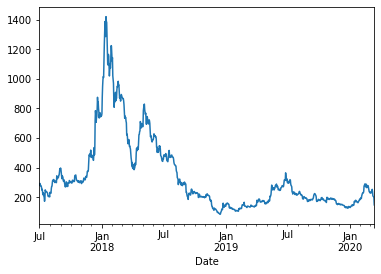

In [159]:
highs.plot()

# **converting to datetime as reading from csv file**

### Date_parser argument

#### Function to use for converting a sequence of string columns to an array of datetime instances. 
The default uses ``dateutil.parser.parser`` to do the conversion. 
Pandas will try to call `date_parser` in three different ways,advancing to the next if an exception occurs: 
     1) Pass one or more arrays (as defined by `parse_dates`) as arguments; 
     2) concatenate (row-wise) the string values from the columns defined by `parse_dates` into a single array and pass that; and 
     3) call `date_parser` once for each row using one or more strings (corresponding to the columns defined by `parse_dates`) as arguments.

In [76]:
dfR = pd.read_csv("C:/Users/Owner/ETH_1h.csv")
dfR.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [82]:
d_parser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %I-%p")
dfR = pd.read_csv("C:/Users/Owner/ETH_1h.csv", parse_dates = ["Date"], date_parser=d_parser )

C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [83]:
dfR.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
